# Importing Library

In [61]:
from PIL import Image, ImageChops
from matplotlib import pyplot as plt

# Assign images

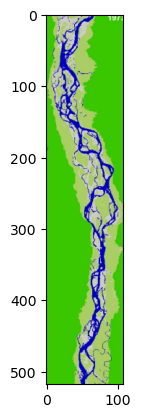

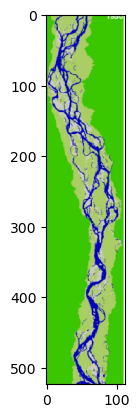

In [62]:
imgx = Image.open("Data/Jamuna river data1973.png")
#img2 = Image.open("Jamuna river data1973.png")

imgy = Image.open("Data/Jamuna river data1980.png")

plt.imshow(imgx)
plt.show()
plt.imshow(imgy)
plt.show()

# Finding the difference

In [63]:
diff = ImageChops.difference(imgx, imgy)

# Output

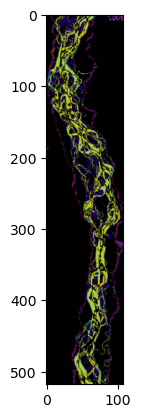

In [64]:
#diff.show()
plt.imshow(diff)
plt.show()

In [65]:
import cv2
import numpy as np

# River for 1980

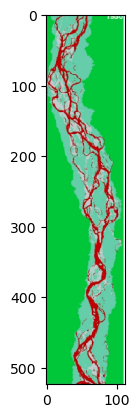

In [66]:
img = cv2.imread('Data/Jamuna river data1980.png')
plt.imshow(img)
plt.show()

Pixel count: 5045


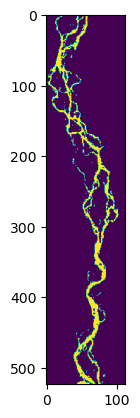

In [67]:
# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# create mask for blue color in hsv
# blue is 240 in range 0 to 360, so for opencv it would be 120
lower = (100,100,100)
upper = (160,255,255)
mask = cv2.inRange(hsv, lower, upper)

# count non-zero pixels in mask
count2=np.count_nonzero(mask)
print('Pixel count:', count2)

# save output
#cv2.imwrite('Jamuna river data1973.png', mask)
plt.imshow(mask)
plt.show()

# River for 1973

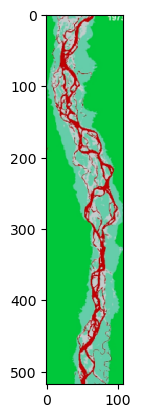

Pixel count: 4887


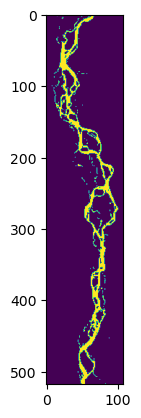

In [68]:
img = cv2.imread('Data/Jamuna river data1973.png')
plt.imshow(img)
plt.show()

# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# create mask for blue color in hsv
mask = cv2.inRange(hsv, lower, upper)

# count non-zero pixels in mask
count1=np.count_nonzero(mask)
print('Pixel count:', count1)

plt.imshow(mask)
plt.show()

# River for 1989

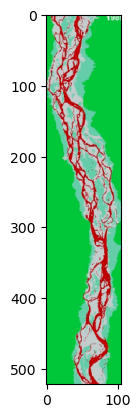

Pixel count: 5937


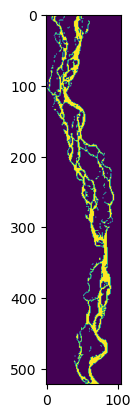

In [69]:
img = cv2.imread('Data/Jamuna river data1989.png')
plt.imshow(img)
plt.show()

# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# create mask for blue color in hsv
mask = cv2.inRange(hsv, lower, upper)

# count non-zero pixels in mask
count3=np.count_nonzero(mask)
print('Pixel count:', count3)

plt.imshow(mask)
plt.show()

# River for 2003

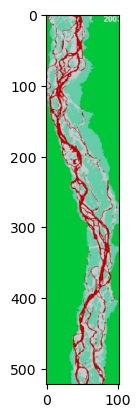

Pixel count: 4578


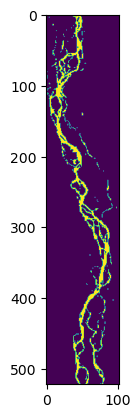

In [70]:
img = cv2.imread('Data/Jamuna river data2003.png')
plt.imshow(img)
plt.show()

# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# create mask for blue color in hsv
mask = cv2.inRange(hsv, lower, upper)

# count non-zero pixels in mask
count4=np.count_nonzero(mask)
print('Pixel count:', count4)

plt.imshow(mask)
plt.show()

# River for 2010

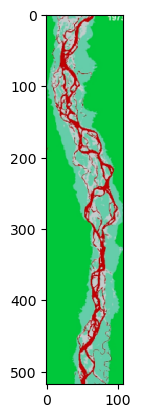

Pixel count: 4887


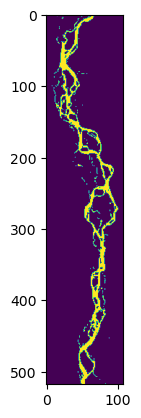

In [71]:
img = cv2.imread('Data/Jamuna river data1973.png')
plt.imshow(img)
plt.show()

# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# create mask for blue color in hsv
mask = cv2.inRange(hsv, lower, upper)

# count non-zero pixels in mask
count5=np.count_nonzero(mask)
print('Pixel count:', count5)

plt.imshow(mask)
plt.show()

# Area difference of 1973-1980

In [72]:
a1=abs(count1-count2)
print(a1)

158


# Area difference of 1980-1989

In [73]:
a2=abs(count2-count3)
print(a2)

892


# Area difference of 1989-2003

In [74]:
a3=abs(count3-count4)
print(a3)

1359


# Area difference of 2003-2010

In [75]:
a4=abs(count4-count5)
print(a4)

309


# Graphical Representation

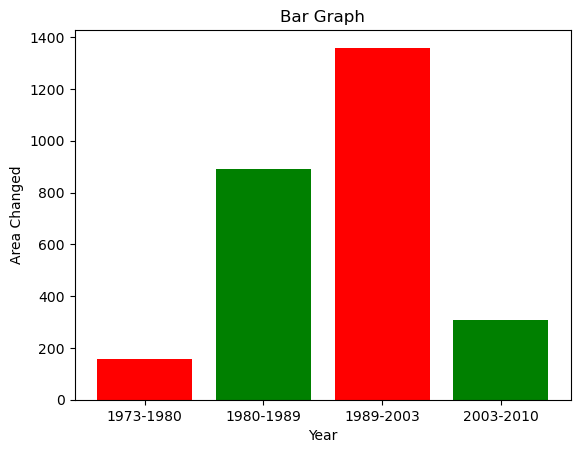

In [76]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4]
  
# heights of bars
height = [a1,a2,a3,a4]
  
# labels for bars
tick_label = ['1973-1980', '1980-1989', '1989-2003', '2003-2010']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('Year')
# naming the y-axis
plt.ylabel('Area Changed')
# plot title
plt.title('Bar Graph')
  
# function to show the plot
plt.show()